# Principal Component Analysis (PCA)

In [4]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

## Synthetic Dataset Creation

In [5]:
# Simulate a dataset to perform PCA on

# Fix a random seed for reproducibility
torch.manual_seed(42)

# Specify the size of the simulated dataset
num_features = 50  # Number of features
num_samples = 200  # Number of samples
rank_latent_factors = 10  # Rank for the latent factors

# Generate random matrices for features and samples
feature_matrix = torch.randn(num_features, rank_latent_factors)
sample_matrix = torch.randn(num_samples, rank_latent_factors)

# Create the dataset by multiplying sample matrix and feature matrix transpose, and add some noise
dataset = sample_matrix @ feature_matrix.T + 0.01 * torch.randn(num_samples, num_features)

# Zero center the data by subtracting the mean of each feature
dataset -= dataset.mean(0, keepdims=True)

## Perform PCA - Compute the Best Rank 10 Subspace Approximation

In [6]:
# Compute the covariance matrix of the centered data
cov_matrix = (1/num_samples) * dataset.T @ dataset

# Perform eigen decomposition on the covariance matrix
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)

# Sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = torch.argsort(eigenvalues, descending=True)
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the top 10 eigenvectors to form the basis for the rank-10 subspace
top_10_eigenvectors = sorted_eigenvectors[:, :10]

## Results Analysis

### Analyze and visualize the results to interpret the variance captured by the principal components

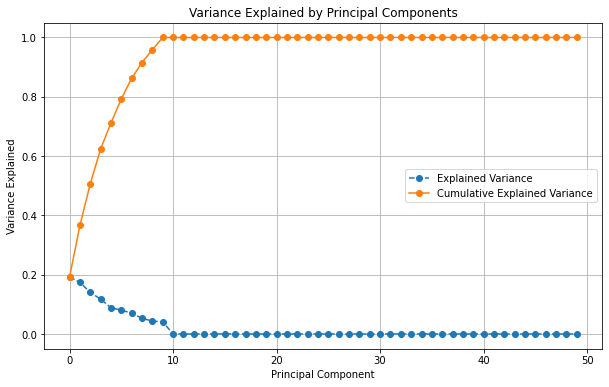

In [7]:
# Compute the explained variance
explained_variance = eigenvalues[sorted_indices] / torch.sum(eigenvalues)

# Compute the cumulative explained variance
cumulative_explained_variance = torch.cumsum(explained_variance, dim=0)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(explained_variance.numpy(), marker='o', linestyle='--', label='Explained Variance')
plt.plot(cumulative_explained_variance.numpy(), marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.legend()
plt.grid(True)
plt.show()

### Further Exploration of PCA Results - 
### Plot the first two principal components to visualize the data in the reduced dimensional space.
### Display a heatmap of the top principal components to understand their relationship with the original features.
### Calculate and visualize the reconstruction error to see how well the selected principal components represent the original data.

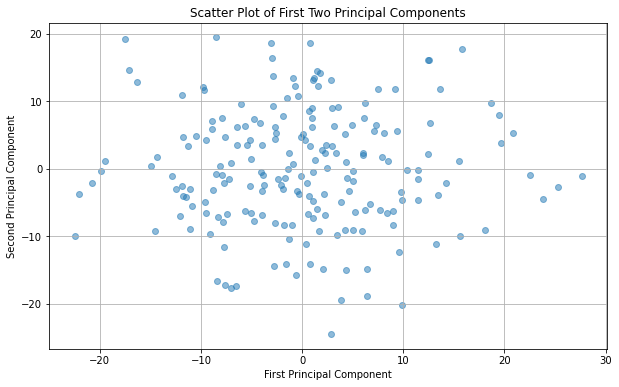

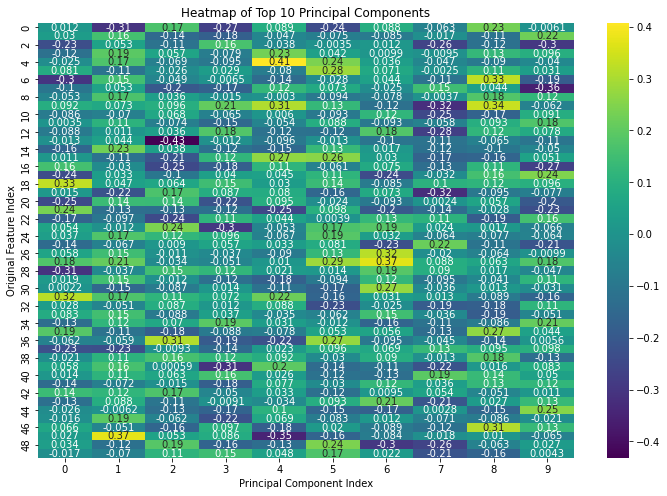

Reconstruction Error: 7.422405178658664e-05


In [8]:
# Scatter plot of the first two principal components
principal_components = dataset @ top_10_eigenvectors
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0].numpy(), principal_components[:, 1].numpy(), alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot of First Two Principal Components')
plt.grid(True)
plt.show()

# Heatmap of the top 10 principal components
plt.figure(figsize=(12, 8))
sns.heatmap(top_10_eigenvectors.numpy(), cmap='viridis', annot=True)
plt.title('Heatmap of Top 10 Principal Components')
plt.xlabel('Principal Component Index')
plt.ylabel('Original Feature Index')
plt.show()

# Reconstruction error
reconstructed_dataset = principal_components @ top_10_eigenvectors.T
reconstruction_error = torch.mean((dataset - reconstructed_dataset) ** 2)
print(f'Reconstruction Error: {reconstruction_error.item()}')